In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
PATH_TO_DATA = './Data/2'


orders = pd.read_csv(f'{PATH_TO_DATA}/olist_orders_dataset.csv')
customers = pd.read_csv(f'{PATH_TO_DATA}/olist_customers_dataset.csv')
order_items = pd.read_csv(f'{PATH_TO_DATA}/olist_order_items_dataset.csv')
products = pd.read_csv(f'{PATH_TO_DATA}/olist_products_dataset.csv')
sellers = pd.read_csv(f'{PATH_TO_DATA}/olist_sellers_dataset.csv')
geolocation = pd.read_csv(f'{PATH_TO_DATA}/olist_geolocation_dataset.csv')
payments = pd.read_csv(f'{PATH_TO_DATA}/olist_order_payments_dataset.csv')
reviews = pd.read_csv(f'{PATH_TO_DATA}/olist_order_reviews_dataset.csv')
cat_name_trans = pd.read_csv(f'{PATH_TO_DATA}/product_category_name_translation.csv')

## Analyse customers

In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [10]:
len(customers['customer_id'].unique())

99441

This shows we have 99441 unique customers.

In [13]:
customers_city = customers.groupby(customers['customer_city']).count()['customer_id'].reset_index()
customers_city = customers_city.rename({"customer_id":"customers_count"}, axis=1)
customers_city["'% Customers count"] = (customers_city['customers_count'] / len(customers)) * 100
customers_city.sort_values('customers_count')

,customer_city,customers_count,'% Customers count
22,acucena,1,0.001006
4113,xexeu,1,0.001006
44,agua preta,1,0.001006
43,agua nova,1,0.001006
42,agua limpa,1,0.001006
...,...,...,...
1143,curitiba,1521,1.529550
558,brasilia,2131,2.142979
453,belo horizonte,2773,2.788588
3155,rio de janeiro,6882,6.920687


sao paulo is leading with customers with 15% market cap.

## Analyse Orders

In [36]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [37]:
null_order_fields = orders.isna().sum().reset_index().rename({"index":"Column", 0:"Null"}, axis=1)
null_order_fields["'%' Null Rate"] = (null_order_fields["Null"] / len(orders)) * 100
null_order_fields

,Column,Null,'%' Null Rate
0,order_id,0,0.000000
1,customer_id,0,0.000000
2,order_status,0,0.000000
3,order_purchase_timestamp,0,0.000000
4,order_approved_at,160,0.160899
5,order_delivered_carrier_date,1783,1.793023
6,order_delivered_customer_date,2965,2.981668
7,order_estimated_delivery_date,0,0.000000


Three columns have null values. We don't need order approved at and order delivered career date for now. Because stakeholders dont have deep operational questions. But we need order_delivered_customer_date which is important to now as customer satisfaction point. As this is very mmin jusr ~3% of data, so we can ignore. Because imputing it may have several issues in decisions.

In [38]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [39]:
len(orders['order_id'].unique())

99441

There are 99441 unique orders.

**"Orders and customers have same count 99441, why? Is there no customers who shop again?"**

In [40]:
order_count = orders.groupby(orders['order_status']).count()['order_id'].reset_index().rename({"order_id":"order_count"}, axis=1)
order_count["'%'order_count"] = (order_count['order_count'] / len(orders)) * 100
order_count

,order_status,order_count,'%'order_count
0,approved,2,0.002011
1,canceled,625,0.628513
2,created,5,0.005028
3,delivered,96478,97.020344
4,invoiced,314,0.315765
5,processing,301,0.302692
6,shipped,1107,1.113223
7,unavailable,609,0.612423


order completion rate: 97% orders are delivered. And cancel rate is also very minimum, less then 0.

In [41]:
orders['delivery_time'] = pd.to_datetime(orders['order_delivered_customer_date']) - pd.to_datetime(orders['order_purchase_timestamp']) 


In [42]:
orders['delivery_time'].sort_values().head(10)

31522   0 days 12:48:07
41803   0 days 18:45:10
38792   0 days 20:31:39
97428   0 days 20:43:20
69580   0 days 21:22:41
51067   0 days 21:25:11
37753   0 days 22:27:49
48878   0 days 22:30:59
48767   0 days 23:37:30
395     0 days 23:39:18
Name: delivery_time, dtype: timedelta64[ns]

In [43]:
orders['delivery_time'].sort_values(ascending=False).head(10)

19590   209 days 15:05:12
55619   208 days 08:26:32
61610   195 days 15:12:59
70307   194 days 20:24:15
89130   194 days 15:12:24
38509   194 days 01:11:24
11399   191 days 11:07:30
81401   189 days 20:42:57
54480   188 days 03:13:51
68769   187 days 17:51:08
Name: delivery_time, dtype: timedelta64[ns]

Highest delivery time is drastic.

In [44]:
# Merge city and state info from customers into orders based on customer_id
orders = orders.merge(
    customers[['customer_id', 'customer_city', 'customer_state']],
    on='customer_id',
    how='left'
)

orders[['order_id', 'delivery_time', 'customer_city', 'customer_state']].head()

,order_id,delivery_time,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,8 days 10:28:40,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,13 days 18:46:08,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,9 days 09:27:40,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,13 days 05:00:36,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,2 days 20:58:23,santo andre,SP


In [54]:
# Group by customer_city and calculate average delivery_time
avg_delivery_by_city = orders.groupby('customer_city')['delivery_time'].mean().reset_index()
avg_delivery_by_city = avg_delivery_by_city.rename(columns={'delivery_time': 'avg_delivery_time'})
avg_delivery_by_city.sort_values('avg_delivery_time', ascending=False).head(20)

,customer_city,avg_delivery_time
2548,novo brasil,148 days 04:11:17
797,capinzal do norte,109 days 01:48:02.500000
24,adhemar de barros,97 days 11:14:39
232,arace,86 days 09:41:40.750000
2221,marcelino vieira,78 days 04:22:39
3699,serra dos dourados,74 days 16:11:40
248,aramari,73 days 15:51:50
1557,humildes,71 days 12:29:46
3274,santa cruz de goias,67 days 14:00:39
2152,machadinho,65 days 18:59:54


In [ ]:
avg_delivery_by_city.sort_values('avg_delivery_time', ascending=True).head(20)

,customer_city,avg_delivery_time
1681,iomere,2 days 23:14:48
3742,siriji,3 days 03:43:20
22,acucena,3 days 17:28:28
2760,pedra bela,3 days 19:54:07
1042,contenda,3 days 22:02:35
...,...,...
3383,santo antonio de goias,NaT
3446,sao domingos do sul,NaT
3453,sao fernando,NaT
3463,sao francisco do humaita,NaT


In [57]:
# Calculate average delivery time for 'sao paulo'
sao_paulo_avg_delivery = avg_delivery_by_city.loc[avg_delivery_by_city['customer_city'] == 'sao paulo', 'avg_delivery_time']
print(f"Average delivery time for sao paulo: {sao_paulo_avg_delivery}")

Average delivery time for sao paulo: 3597   8 days 01:37:41.070849395
Name: avg_delivery_time, dtype: timedelta64[ns]


In [45]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])


# Extract date/time features
orders['year'] = orders['order_purchase_timestamp'].dt.year
orders['month'] = orders['order_purchase_timestamp'].dt.month
orders['day'] = orders['order_purchase_timestamp'].dt.day
orders['hour'] = orders['order_purchase_timestamp'].dt.hour
orders['day_of_week'] = orders['order_purchase_timestamp'].dt.dayofweek  # Monday=0, Sunday=6
orders['day_name'] = orders['order_purchase_timestamp'].dt.day_name()
orders['week_of_year'] = orders['order_purchase_timestamp'].dt.isocalendar().week
orders['quarter'] = orders['order_purchase_timestamp'].dt.quarter

**Data is Augmented to break down and view more insights.**

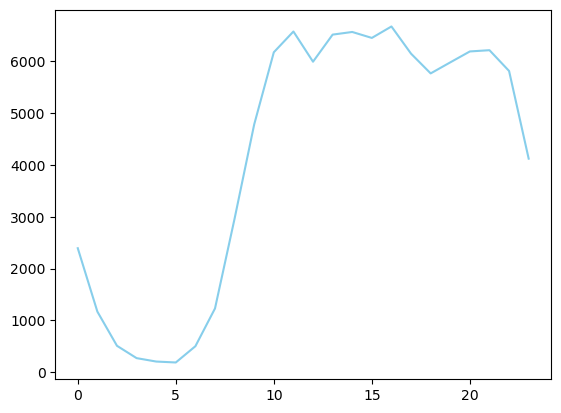

In [46]:
hourly_purchases = orders['hour'].value_counts().sort_index()
plt.plot(hourly_purchases.index, hourly_purchases.values, color='skyblue')

Sales Rises after 5Am then this remains at peak untill midnight. 

<BarContainer object of 7 artists>

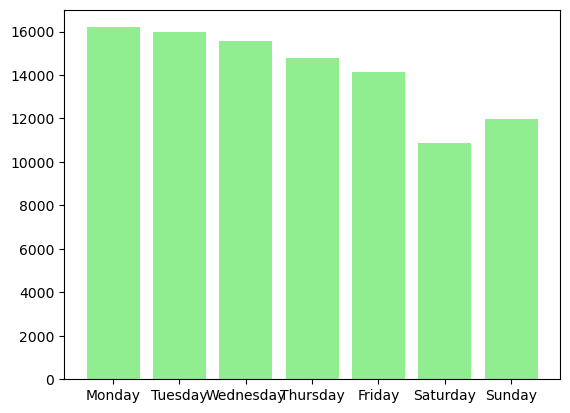

In [47]:
daily_purchases = orders['day_of_week'].value_counts().sort_index()
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.bar(day_labels, daily_purchases.values, color='lightgreen')

Early weekdays are most rewarding.

<BarContainer object of 12 artists>

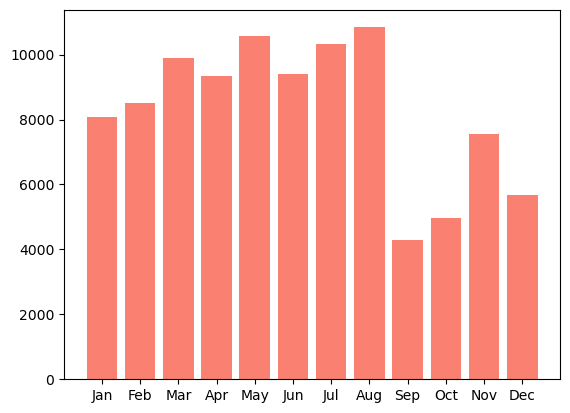

In [48]:
monthly_purchases = orders['month'].value_counts().sort_index()
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(month_labels, monthly_purchases.values, color='salmon')

Summemr is most rewarding.

<BarContainer object of 3 artists>

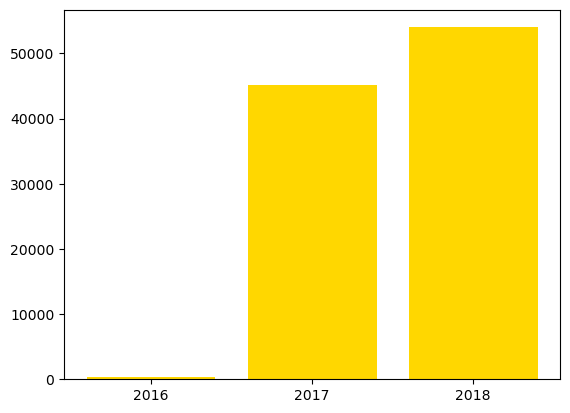

In [49]:
yearly_purchases = orders['year'].value_counts().sort_index()
plt.bar(yearly_purchases.index.astype(str), yearly_purchases.values, color='gold')

([<matplotlib.patches.Wedge at 0x18800b18f50>,
 [Text(0.7372720824613642, 0.8163515642314183, 'Q1'),
  Text(-0.9420408320262879, 0.5679428411338763, 'Q2'),
  Text(-0.4103141231116002, -1.0206087988917, 'Q3'),
  Text(0.9235556351072889, -0.5975324165780233, 'Q4')],
 [Text(0.4021484086152895, 0.44528267139895544, '26.6%'),
  Text(-0.5138404538325205, 0.30978700425484157, '29.5%'),
  Text(-0.22380770351541826, -0.5566957084863818, '25.6%'),
  Text(0.5037576191494302, -0.32592677267892173, '18.3%')])

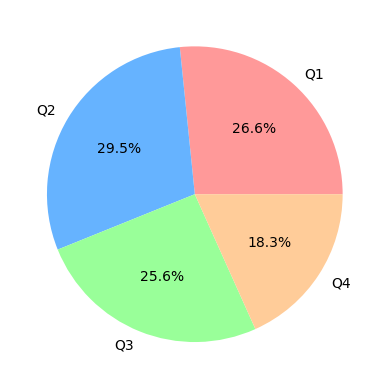

In [50]:
quarterly_purchases = orders['quarter'].value_counts().sort_index()
plt.pie(quarterly_purchases.values, labels=['Q1', 'Q2', 'Q3', 'Q4'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

<Axes: xlabel='hour', ylabel='day_of_week'>

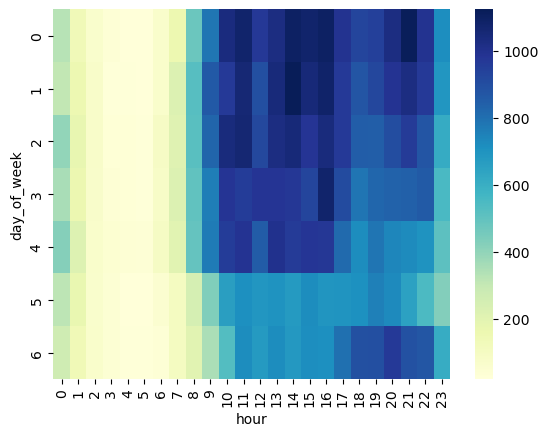

In [51]:
import seaborn as sns
pivot_table = orders.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
sns.heatmap(pivot_table, cmap="YlGnBu")

## Analyse Order items

In [75]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [78]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [76]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [80]:
len(order_items['order_id'].unique())

98666

**Orders table has 99441 unique orders but order_items has 98666 orders, Why?**

It shows one order has multiple items.

Each record shows order item which relate to previous order or new.

In [92]:
order_items_count = order_items.groupby(order_items.order_item_id).count()["order_id"].reset_index().rename({"order_id":"items_count"}, axis=1)
order_items_count["'%' items_count"] = (order_items_count['items_count'] / len(order_items)) * 100
order_items_count

,order_item_id,items_count,'%' items_count
0,1,98666,87.586329
1,2,9803,8.702175
2,3,2287,2.030182
3,4,965,0.856636
4,5,460,0.408344
5,6,256,0.227253
6,7,58,0.051487
7,8,36,0.031957
8,9,28,0.024856
9,10,25,0.022193


product with ID 1 is highest selling, with 87% olist market cap.

In [93]:
order_items['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

Max price of items is much higher then mean. Is 0.85 would be the price?

In [94]:
order_items['freight_value'].describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

In [95]:
order_items[order_items['price'] > 6000]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21


In [108]:
order_items[order_items['price'] < 6000]['price'].describe()

count    112647.000000
mean        120.479735
std         180.513348
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        4799.000000
Name: price, dtype: float64

In [107]:
order_items[order_items['freight_value'] > 400]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
73486,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.0,409.68


In [106]:
order_items[order_items['freight_value'] < 400]['freight_value'].describe()

count    112649.000000
mean         19.986861
std          15.763774
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         375.280000
Name: freight_value, dtype: float64

Seems like where the price is higher the freight value is also higher.

<Axes: ylabel='price'>

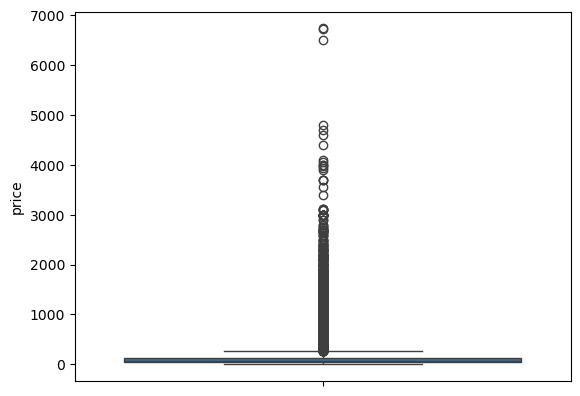

In [99]:
sns.boxplot(order_items['price'])

<Axes: ylabel='freight_value'>

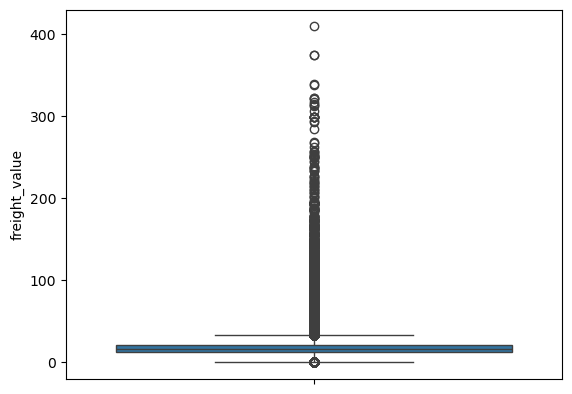

In [100]:
sns.boxplot(order_items['freight_value'])

**We have two extreme value products I don't know is they are products or just outliar. Also there is one extreame delivery value. Excluding these values doesn't effect mean a lot just minor change so I'll keep them in data.**

In [176]:
len(order_items['seller_id'].unique())

3095

There are 3095 sellers who completed 98666 orders and sold 112650 products.

In [177]:
order_items.groupby(order_items.seller_id).count()['order_id'].sort_values(ascending=False).reset_index().rename({"order_id":"Products Count"}, axis=1)

,seller_id,Products Count
0,6560211a19b47992c3666cc44a7e94c0,2033
1,4a3ca9315b744ce9f8e9374361493884,1987
2,1f50f920176fa81dab994f9023523100,1931
3,cc419e0650a3c5ba77189a1882b7556a,1775
4,da8622b14eb17ae2831f4ac5b9dab84a,1551
...,...,...
3090,cf281cf8b7affbdfe751b29cc85580e1,1
3091,d1e2fe627180431ffda076abb303c56f,1
3092,d1aa1ec0839dcab73a6161130eb1f94a,1
3093,d1a5cc844736958c11b8efab9a2b4c87,1


orders or products?

In [178]:
# Group by seller_id to find total products sold by each seller
seller_product_counts = order_items.groupby('seller_id')['order_id'].count().reset_index()
seller_product_counts = seller_product_counts.rename(columns={'order_id': 'total_products_sold'})
seller_product_counts = seller_product_counts.sort_values('total_products_sold', ascending=False)

# Find for each seller, which order_item_id was the highest selling
seller_orderitem_counts = order_items.groupby(['seller_id', 'order_item_id']).size().reset_index(name='Orders count')
idx = seller_orderitem_counts.groupby('seller_id')['Orders count'].idxmax()
top_orderitem_per_seller = seller_orderitem_counts.loc[idx].reset_index(drop=True)

# Display top sellers and their highest selling order_item_id
top_sellers = seller_product_counts.head(10)
top_sellers_with_top_item = top_sellers.merge(top_orderitem_per_seller, on='seller_id', how='left')

top_sellers_with_top_item

,seller_id,total_products_sold,order_item_id,Orders count
0,6560211a19b47992c3666cc44a7e94c0,2033,1,1844
1,4a3ca9315b744ce9f8e9374361493884,1987,1,1760
2,1f50f920176fa81dab994f9023523100,1931,1,1389
3,cc419e0650a3c5ba77189a1882b7556a,1775,1,1703
4,da8622b14eb17ae2831f4ac5b9dab84a,1551,1,1298
5,955fee9216a65b617aa5c0531780ce60,1499,1,1281
6,1025f0e2d44d7041d6cf58b6550e0bfa,1428,1,903
7,7c67e1448b00f6e969d365cea6b010ab,1364,1,975
8,ea8482cd71df3c1969d7b9473ff13abc,1203,1,1136
9,7a67c85e85bb2ce8582c35f2203ad736,1171,1,1150


In [179]:
# Add percentage columns for total products sold and orders count
total_products = seller_product_counts['total_products_sold'].sum()
top_sellers_with_top_item['% total_products_sold'] = (top_sellers_with_top_item['total_products_sold'] / total_products) * 100

total_orders = top_sellers_with_top_item['Orders count'].sum()
top_sellers_with_top_item['% Orders count'] = (top_sellers_with_top_item['Orders count'] / total_orders) * 100

top_sellers_with_top_item

,seller_id,total_products_sold,order_item_id,Orders count,% total_products_sold,% Orders count
0,6560211a19b47992c3666cc44a7e94c0,2033,1,1844,1.804705,13.721259
1,4a3ca9315b744ce9f8e9374361493884,1987,1,1760,1.763870,13.096213
2,1f50f920176fa81dab994f9023523100,1931,1,1389,1.714159,10.335590
3,cc419e0650a3c5ba77189a1882b7556a,1775,1,1703,1.575677,12.672074
4,da8622b14eb17ae2831f4ac5b9dab84a,1551,1,1298,1.376831,9.658457
5,955fee9216a65b617aa5c0531780ce60,1499,1,1281,1.330670,9.531959
6,1025f0e2d44d7041d6cf58b6550e0bfa,1428,1,903,1.267643,6.719250
7,7c67e1448b00f6e969d365cea6b010ab,1364,1,975,1.210830,7.255004
8,ea8482cd71df3c1969d7b9473ff13abc,1203,1,1136,1.067909,8.453010
9,7a67c85e85bb2ce8582c35f2203ad736,1171,1,1150,1.039503,8.557184


"6560211a19b47992c3666cc44a7e94c0" is winner among all sellers, also around ~50% orders comes from first 4 seller who sold 6.7% products of all products.

In [180]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [181]:
# Merge seller city and state into top_sellers_with_top_item
top_sellers_with_top_item = top_sellers_with_top_item.merge(
    sellers[['seller_id', 'seller_city', 'seller_state']],
    on='seller_id',
    how='left'
)

top_sellers_with_top_item

,seller_id,total_products_sold,order_item_id,Orders count,% total_products_sold,% Orders count,seller_city,seller_state
0,6560211a19b47992c3666cc44a7e94c0,2033,1,1844,1.804705,13.721259,sao paulo,SP
1,4a3ca9315b744ce9f8e9374361493884,1987,1,1760,1.763870,13.096213,ibitinga,SP
2,1f50f920176fa81dab994f9023523100,1931,1,1389,1.714159,10.335590,sao jose do rio preto,SP
3,cc419e0650a3c5ba77189a1882b7556a,1775,1,1703,1.575677,12.672074,santo andre,SP
4,da8622b14eb17ae2831f4ac5b9dab84a,1551,1,1298,1.376831,9.658457,piracicaba,SP
5,955fee9216a65b617aa5c0531780ce60,1499,1,1281,1.330670,9.531959,sao paulo,SP
6,1025f0e2d44d7041d6cf58b6550e0bfa,1428,1,903,1.267643,6.719250,sao paulo,SP
7,7c67e1448b00f6e969d365cea6b010ab,1364,1,975,1.210830,7.255004,itaquaquecetuba,SP
8,ea8482cd71df3c1969d7b9473ff13abc,1203,1,1136,1.067909,8.453010,sao paulo,SP
9,7a67c85e85bb2ce8582c35f2203ad736,1171,1,1150,1.039503,8.557184,sao paulo,SP


In [182]:
# Merge order_items with reviews on 'order_id' to associate each review with its seller
order_reviews = order_items[['order_id', 'seller_id']].merge(
    reviews[['order_id', 'review_score']],
    on='order_id',
    how='left'
)

# Group by seller_id to aggregate review statistics
sellers_reviews = order_reviews.groupby('seller_id').agg(
    total_reviews=('review_score', 'count'),
    avg_review_score=('review_score', 'mean'),
    median_review_score=('review_score', 'median'),
    std_review_score=('review_score', 'std')
).reset_index()

sellers_reviews.head()

,seller_id,total_reviews,avg_review_score,median_review_score,std_review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,3,3.666667,5.0,2.309401
1,001cca7ae9ae17fb1caed9dfb1094831,236,3.902542,5.0,1.442159
2,001e6ad469a905060d959994f1b41e4f,1,1.000000,1.0,NaN
3,002100f778ceb8431b7a1020ff7ab48f,56,3.982143,5.0,1.394679
4,003554e2dce176b5555353e4f3555ac8,1,5.000000,5.0,NaN


In [183]:
# Merge avg_review_score from sellers_reviews into top_sellers_with_top_item
top_sellers_with_top_item = top_sellers_with_top_item.merge(
    sellers_reviews[['seller_id', 'avg_review_score']],
    on='seller_id',
    how='left'
)

top_sellers_with_top_item

,seller_id,total_products_sold,order_item_id,Orders count,% total_products_sold,% Orders count,seller_city,seller_state,avg_review_score
0,6560211a19b47992c3666cc44a7e94c0,2033,1,1844,1.804705,13.721259,sao paulo,SP,3.909406
1,4a3ca9315b744ce9f8e9374361493884,1987,1,1760,1.763870,13.096213,ibitinga,SP,3.803931
2,1f50f920176fa81dab994f9023523100,1931,1,1389,1.714159,10.335590,sao jose do rio preto,SP,3.982402
3,cc419e0650a3c5ba77189a1882b7556a,1775,1,1703,1.575677,12.672074,santo andre,SP,4.069575
4,da8622b14eb17ae2831f4ac5b9dab84a,1551,1,1298,1.376831,9.658457,piracicaba,SP,4.071429
5,955fee9216a65b617aa5c0531780ce60,1499,1,1281,1.330670,9.531959,sao paulo,SP,4.051713
6,1025f0e2d44d7041d6cf58b6550e0bfa,1428,1,903,1.267643,6.719250,sao paulo,SP,3.849755
7,7c67e1448b00f6e969d365cea6b010ab,1364,1,975,1.210830,7.255004,itaquaquecetuba,SP,3.348208
8,ea8482cd71df3c1969d7b9473ff13abc,1203,1,1136,1.067909,8.453010,sao paulo,SP,3.953216
9,7a67c85e85bb2ce8582c35f2203ad736,1171,1,1150,1.039503,8.557184,sao paulo,SP,4.234991


In [184]:
# Find the seller(s) with the highest average review score among top_sellers_with_top_item
max_avg_review = top_sellers_with_top_item['avg_review_score'].max()
highest_rated_sellers = top_sellers_with_top_item[top_sellers_with_top_item['avg_review_score'] == max_avg_review]

highest_rated_sellers

,seller_id,total_products_sold,order_item_id,Orders count,% total_products_sold,% Orders count,seller_city,seller_state,avg_review_score
9,7a67c85e85bb2ce8582c35f2203ad736,1171,1,1150,1.039503,8.557184,sao paulo,SP,4.234991


7a67c85e85bb2ce8582c35f2203ad736 Seller keeps highest trrating and place between top 10 sellers, we should promot such huble sellers.

# Analyse Products

In [29]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [30]:
# Merge English category names from cat_name_trans into products
products = products.merge(
    cat_name_trans.rename(columns={'product_category_name': 'product_category_name', 'product_category_name_english': 'product_category_name_english'}),
    on='product_category_name',
    how='left'
)

products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [31]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


In [32]:
products.isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [33]:
len(products['product_id'].unique())

32951

In [34]:
len(products['product_category_name_english'].unique())

72

It means  a product ID has multiple categories associated. We may say 74 product categories has 32951 products associated.

# Analyse Payment


In [135]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [136]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [138]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [146]:
payments.groupby(payments['payment_sequential']).count()

,order_id,payment_type,payment_installments,payment_value
payment_sequential,,,,
1,97809,97809,97809,97809
2,1354,1354,1354,1354
3,150,150,150,150
4,54,54,54,54
5,24,24,24,24
6,20,20,20,20
7,9,9,9,9
8,7,7,7,7
9,1,1,1,1


In [139]:
len(payments['order_id'].unique())

99440

There are 99440 unique orders it.

The `payment_sequential` column in the `payments` table indicates the sequence number of the payment for a given order. If an order was paid in multiple installments or with multiple payment methods, each payment is recorded with a sequential number (1 for the first payment, 2 for the second, etc.). If for most orders, this value is 1, meaning there was only one payment transaction for that order.

In [149]:
# Calculate count and percentage for each payment_sequential value
sequential_stats = payments['payment_sequential'].value_counts().sort_index().reset_index()
sequential_stats.columns = ['payment_sequential', 'orders_count']
sequential_stats['percentage_orders'] = (sequential_stats['orders_count'] / len(payments)) * 100

print("Payment sequential statistics:")
print(sequential_stats)

Payment sequential statistics:
    payment_sequential  orders_count  percentage_orders
0                    1         99360          95.643301
1                    2          3039           2.925322
2                    3           581           0.559267
3                    4           278           0.267601
4                    5           170           0.163641
5                    6           118           0.113586
6                    7            82           0.078933
7                    8            54           0.051980
8                    9            43           0.041392
9                   10            34           0.032728
10                  11            29           0.027915
11                  12            21           0.020214
12                  13            13           0.012514
13                  14            10           0.009626
14                  15             8           0.007701
15                  16             6           0.005776
16               

**This is why we have duplicate orders, but I still not sure howw this can help or why used, so I am leaving it and analysing orders, payments and payment behaviour.**

In [140]:
payments.drop_duplicates('order_id', inplace = True)

In [141]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99440 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              99440 non-null  object 
 1   payment_sequential    99440 non-null  int64  
 2   payment_type          99440 non-null  object 
 3   payment_installments  99440 non-null  int64  
 4   payment_value         99440 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [145]:
payments['payment_value'].describe()

count    99440.000000
mean       158.334781
std        219.518488
min          0.000000
25%         60.050000
50%        103.350000
75%        175.130000
max      13664.080000
Name: payment_value, dtype: float64

In [143]:
# Analyse payment methods: count, percentage, and average payment value
payment_method_stats = payments.groupby('payment_type').agg(
    orders_count=('order_id', 'count'),
    avg_payment_value=('payment_value', 'mean')
).reset_index()
payment_method_stats['percentage_orders'] = (payment_method_stats['orders_count'] / len(payments)) * 100

print("Payment method statistics:")
print(payment_method_stats)


Payment method statistics:
  payment_type  orders_count  avg_payment_value  percentage_orders
0       boleto         19784         145.034435          19.895414
1  credit_card         75387         164.733738          75.811545
2   debit_card          1527         142.711061           1.535599
3  not_defined             3           0.000000           0.003017
4      voucher          2739          87.165849           2.754425


75% percent customers prefer creddit cards with average payment 164. And 3 orders payed no money for orders.

In [144]:
# Analyse by installments: average payment value, orders count, and percentage of orders
installment_stats = payments.groupby('payment_installments').agg(
    orders_count=('order_id', 'count'),
    avg_payment_value=('payment_value', 'mean')
).reset_index()
installment_stats['percentage_orders'] = (installment_stats['orders_count'] / len(payments)) * 100

print("\nInstallment statistics:")
print(installment_stats)


Installment statistics:
    payment_installments  orders_count  avg_payment_value  percentage_orders
0                      0             2          94.315000           0.002011
1                      1         48664         118.005281          48.938053
2                      2         12250         127.617989          12.318986
3                      3         10349         143.063285          10.407281
4                      4          7028         164.323569           7.067578
5                      5          5193         183.343953           5.222245
6                      6          3879         210.338920           3.900845
7                      7          1608         187.906754           1.617056
8                      8          4229         307.834209           4.252816
9                      9           639         203.759092           0.642599
10                    10          5261         414.493055           5.290628
11                    11            23         124.

~48% orders prefer 1 installment with 118 avg payment value, and 70% orders prefer upto 3 installments with average payment value ~130.

# Analyse Reviews

In [150]:
reviews.head()


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [155]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [151]:
reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

**We donn't need the columns with null values.**

In [164]:
# Review score distribution
review_score_counts = reviews['review_score'].value_counts().sort_index()
review_score_percent = (review_score_counts / len(reviews)) * 100

print("Review score distribution (counts):")
print(review_score_counts)
print("\nReview score distribution (percentage):")
print(review_score_percent)

Review score distribution (counts):
review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

Review score distribution (percentage):
review_score
1    11.513344
2     3.175643
3     8.242965
4    19.291704
5    57.776344
Name: count, dtype: float64


C:\Users\ahmad\AppData\Local\Temp\ipykernel_22460\4059861096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=review_score_counts.index, y=review_score_counts.values, palette="Blues_d")


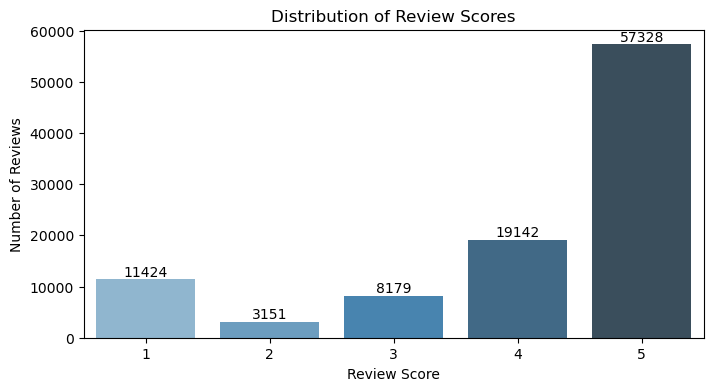

In [166]:
# Plot review score distribution with numbers on bars
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=review_score_counts.index, y=review_score_counts.values, palette="Blues_d")
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Scores')

# Add numbers on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.show()

**5 star rating is only ~57% and 1 star is ~11%, we should degrade low quallity sellers on top and help small sellers below them to grow and improve rating.**